In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:\malaria\cell_images"))

['cell_images', 'Parasitized', 'Uninfected']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
parasitized_data = os.listdir('D:/malaria/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('D:/malaria/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


# PARASITIZED DATA

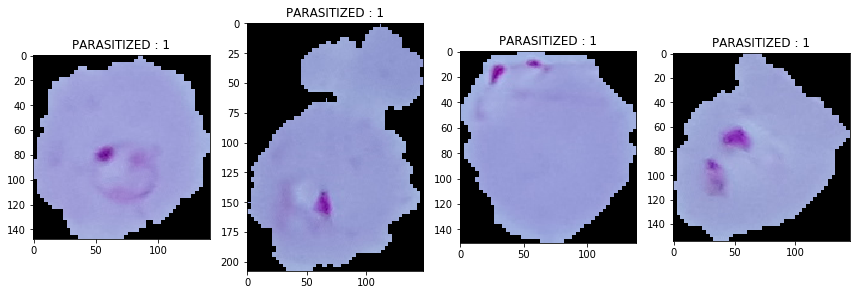

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('D:/malaria/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

# UNINFECTTED DATA

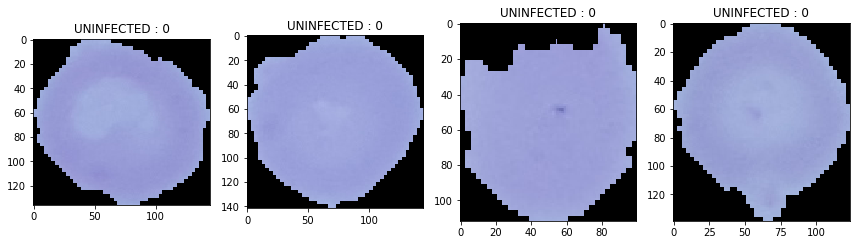

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('D:/malaria/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.

In [12]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('D:/malaria/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('D:/malaria/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

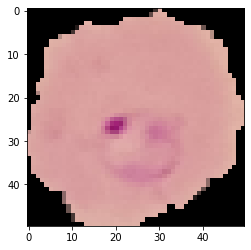

In [13]:
plt.imshow(data[0])
plt.show()

You can see a small clot which is circular inside the image for infected while for the uninfected the cellular image is clean without clots.

In [14]:
image_data = np.array(data)
labels = np.array(labels)

In [15]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [17]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [18]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (14076, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (3519, 50, 50, 3)
SHAPE OF TRAINING LABELS : (14076, 2)
SHAPE OF TESTING LABELS : (3519, 2)


In [19]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

# CNN Model

In [20]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [21]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________

In [22]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [23]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
14076/14076 [==============================] - 93s 7ms/step - loss: 0.5546 - acc: 0.7722
Epoch 2/20
14076/14076 [==============================] - 90s 6ms/step - loss: 0.2563 - acc: 0.8962
Epoch 3/20
14076/14076 [==============================] - 91s 6ms/step - loss: 0.1826 - acc: 0.9277
Epoch 4/20
14076/14076 [==============================] - 92s 7ms/step - loss: 0.1479 - acc: 0.9407
Epoch 5/20
14076/14076 [==============================] - 92s 7ms/step - loss: 0.1413 - acc: 0.9471
Epoch 6/20
14076/14076 [==============================] - 92s 7ms/step - loss: 0.1289 - acc: 0.9518
Epoch 7/20
14076/14076 [==============================] - 92s 7ms/step - loss: 0.1289 - acc: 0.9508
Epoch 8/20
14076/14076 [==============================] - 91s 6ms/step - loss: 0.1216 - acc: 0.9551
Epoch 9/20
14076/14076 [==============================] - 91s 6ms/step - loss: 0.1184 - acc: 0.9566
Epoch 10/20
14076/14076 [===========================

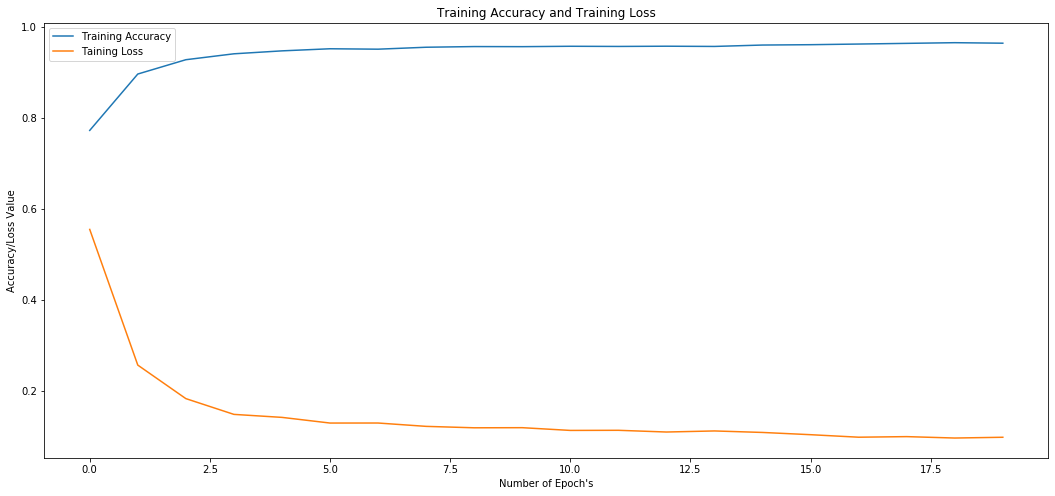

In [24]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [25]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

3519/3519 [==============================] - 6s 2ms/step


In [26]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.10421743200423365
ACCURACY : 0.9622051716697727


In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [29]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [30]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [31]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
219/219 [==============================] - 84s 382ms/step - loss: 0.7207 - acc: 0.6996
Epoch 2/50
219/219 [==============================] - 76s 346ms/step - loss: 0.4867 - acc: 0.7880
Epoch 3/50
219/219 [==============================] - 81s 368ms/step - loss: 0.4351 - acc: 0.8122
Epoch 4/50
219/219 [==============================] - 75s 344ms/step - loss: 0.4008 - acc: 0.8254
Epoch 5/50
219/219 [==============================] - 73s 333ms/step - loss: 0.3683 - acc: 0.8336
Epoch 6/50
219/219 [==============================] - 80s 367ms/step - loss: 0.3202 - acc: 0.8535
Epoch 7/50
219/219 [==============================] - 74s 336ms/step - loss: 0.3025 - acc: 0.8600
Epoch 8/50
219/219 [==============================] - 81s 370ms/step - loss: 0.2835 - acc: 0.8708
Epoch 9/50
219/219 [==============================] - 76s 348ms/step - loss: 0.2682 - acc: 0.8763
Epoch 10/50
219/219 [==============================] - 79s 360ms/step - loss: 0.2637 - acc: 0.8778
Epoch 11/50
219/219

In [33]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [34]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.35193163752555845
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.88125


In [ ]:
https://www.kaggle.com/kushal1996/detecting-malaria-cnn

In [ ]:
https://github.com/anjanatiha/Malaria-Parasite-Detection-in-Thin-Blood-Smear-Images-with-Convolutional-Neural-Networks

In [3]:
infected = os.listdir('D:/malaria/cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('D:/malaria/cell_images/cell_images/Uninfected/')

In [4]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("D:/malaria/cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("D:/malaria/cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [5]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

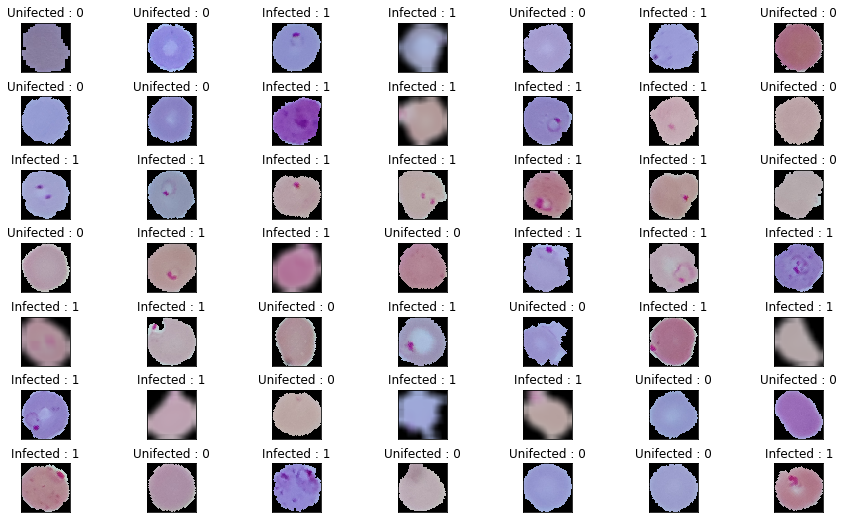

In [6]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()


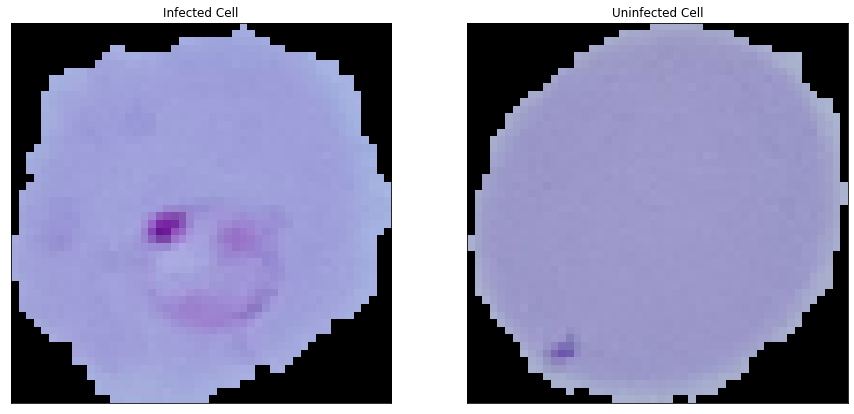

In [7]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()